In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import galess.LensStat.lens_stat as ls
import galess.Utils.ls_utils as utils
import galess.Plots.lens_plot as lens_plot
import galess.HOD.HOD as HOD

h = 0.7
___PLOT_FOR_KEYNOTE___ = 1

M_array     = np.linspace(-13 , -25 , 25)
sigma_array = np.linspace(100 , 400 , 31)
zl_array    = np.arange(0.  , 2.5 , 0.1)
zs_array    = np.arange(0.  , 5.4 , 0.2)

#sigma_array = np.linspace(100 , 400 , 21)
#zl_array    = np.linspace(0.  , 2.5 , 26)
#zs_array    = np.linspace(0.  , 7.  , 29)

min_SNR     = 20
arc_mu_thr  = 3

surveys_titles = [
     'COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W',
     'PEARLS NEP F115W', 'PEARLS NEP F150W', 'PEARLS NEP F277W',
     'JADES Deep F115W', 'JADES Deep F150W', 'JADES Deep F277W',
     'COSMOS HST i band',
     'DES i band',
     'SUBARU HSC SuGOHI i band',
     'EUCLID Wide VIS',
     'Roman HLWA J',
     'LSST i band', 'LSSTsinglevisit i band'
     'CFHTLS i band']

/Users/giofer/anaconda3/envs/HOD/lib/python3.11/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


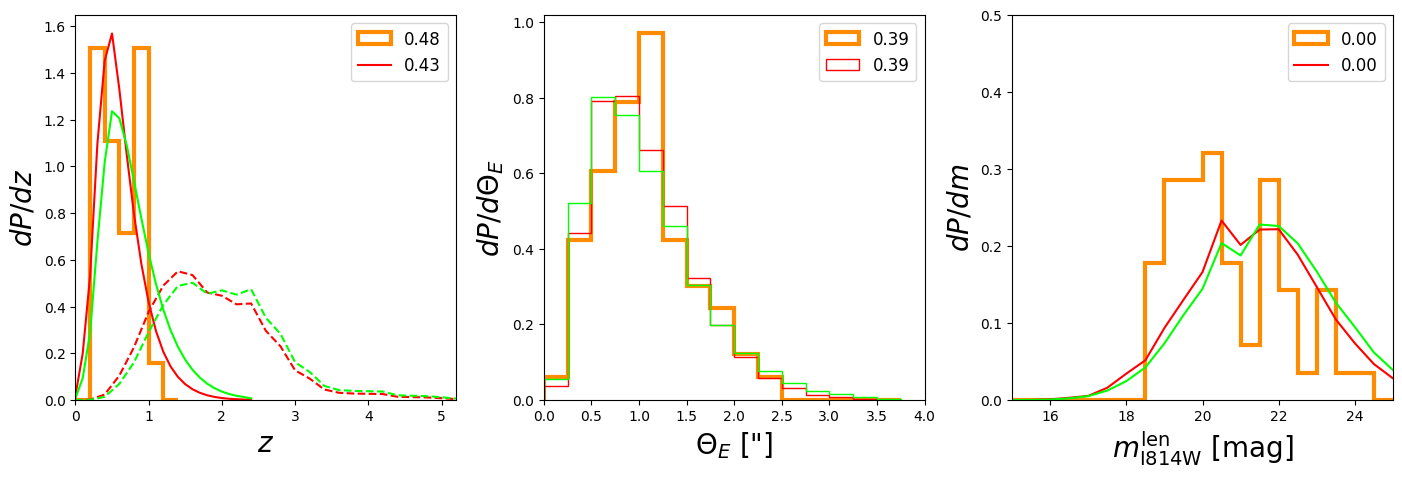

In [45]:
import pandas as pd
from scipy import integrate
from scipy.stats import kstest

FAURE_A_data  = pd.read_csv('../galess/data/FAURE_2008/FAURE_A.csv')
FAURE_A_names = FAURE_A_data['Cosmos Name'].to_numpy()
FAURE_A_zl    = FAURE_A_data['z_l'].to_numpy()
FAURE_A_Rarc  = FAURE_A_data['R_arc'].to_numpy()
FAURE_A_Reff  = FAURE_A_data['Reff'].to_numpy()
FAURE_A_m_Ib  = FAURE_A_data['mag_814W'].to_numpy()
FAURE_A_ell   = FAURE_A_data['ell'].to_numpy()
FAURE_A_m_src = FAURE_A_data['mag_814W_src'].to_numpy()

FAURE_B_data  = pd.read_csv('../galess/data/FAURE_2008/FAURE_B.csv')
FAURE_B_names = FAURE_B_data['Cosmos Name'].to_numpy()
FAURE_B_zl    = FAURE_B_data['z_l'].to_numpy()
FAURE_B_Rarc  = FAURE_B_data['R_arc'].to_numpy()
FAURE_B_Reff  = FAURE_B_data['Reff'].to_numpy()
FAURE_B_m_Ib  = FAURE_B_data['mag_814W'].to_numpy()
FAURE_B_ell   = FAURE_B_data['ell'].to_numpy()
FAURE_B_m_src = FAURE_B_data['mag_814W_src'].to_numpy()
_nbins_zl = np.arange(0.0, 1.6, 0.2 )
_nbins_zs = np.arange(0.0, 5  , 0.5 )
_nbins_sg = np.arange(100, 400, 25  )
_nbins_Re = np.arange(0  , 4  , 0.25)
m_obs = np.linspace(15, 30, 31)
line_thick = 3
ER_col1, cc2  = 'darkorange', 'lime'
_ALPHA_ = 1
sg_array_Faure = np.linspace(150 , 400 , 26) #sort of equiv to M_V<-20
title = 'COSMOS HST i band FAURE'
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
_ , __  , ___, P_zs_LL  , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
_ , __  , ___, P_zs_noLL  , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
if 1: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_LL, Theta_E_LL, prob_LL, P_zs_LL, P_zl_LL, P_sg_LL
else: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_noLL, Theta_E_noLL, prob_noLL, P_zs_noLL, P_zl_noLL, P_sg_noLL
ccc = 'r'
fig, ax = plt.subplots(1, 3, figsize=(17, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=.23, hspace=.2)
F_zl_hist = ax[0].hist( np.append(FAURE_A_zl,  FAURE_B_zl)          , bins=_nbins_zl, density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_, label=f'Faure 2008 - Full Sample ({len(np.append(FAURE_A_zl,  FAURE_B_zl))})')
F_Ra_hist = ax[1].hist( np.append(FAURE_A_Rarc/1.5,FAURE_B_Rarc/1.5), bins=_nbins_Re, density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_)
F_mI_hist = ax[2].hist( np.append(FAURE_A_m_Ib, FAURE_B_m_Ib)       , bins=m_obs  , density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_)
ax[0].plot(zl_array, P_zl, c=ccc, ls='-', label=title)
ax[0].plot(zs_array, P_zs, c=ccc, ls='--')
ax[0].set_xlim((0,5.2))
ax[0].set_xlabel(r'$z$', fontsize=20)
ax[0].set_ylabel(r'$dP/dz$', fontsize=20)
T_hist_Mason = ax[1].hist(np.ravel(Theta_E), weights=np.ravel(matrix), bins = _nbins_Re,
            range=(0, 3), density=True, histtype='step', color=ccc, ls = '-', label=title)
ax[1].set_xlabel(r'$\Theta_E$ ["]', fontsize=20)
ax[1].set_ylabel(r'$dP/d\Theta_E$', fontsize=20)
ax[1].set_xlim((0,4))
m_lens = ls.get_len_magnitude_distr(m_obs, zl_array, sg_array_Faure, matrix)
norm = integrate.simps(m_lens, m_obs)
ax[2].plot(m_obs, m_lens/norm, color=ccc)
ax[2].set_xlabel(r'$m_\text{I814W}^\text{len}$ [mag]', fontsize=20)
ax[2].set_ylabel(r'$dP/dm$', fontsize=20)
ax[2].set_xlim((15,25))
ax[2].set_ylim((0,0.5))

pval_zl_Mason = kstest(F_zl_hist[0], P_zl)[1]
pval_Ra_Mason = kstest(F_Ra_hist[0], T_hist_Mason[0])[1]
pval_mI_Mason = kstest(F_mI_hist[0], m_lens/norm)[1]

title = 'COSMOS HST i band FAURE Geng'
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
_ , __  , ___, P_zs_LL  , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
_ , __  , ___, P_zs_noLL  , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
if 1: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_LL, Theta_E_LL, prob_LL, P_zs_LL, P_zl_LL, P_sg_LL
else: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_noLL, Theta_E_noLL, prob_noLL, P_zs_noLL, P_zl_noLL, P_sg_noLL
ax[0].plot(zl_array, P_zl, c=cc2, ls='-', label=title)
ax[0].plot(zs_array, P_zs, c=cc2, ls='--')
ax[0].set_xlim((0,5.2))
ax[0].set_xlabel(r'$z$', fontsize=20)
ax[0].set_ylabel(r'$dP/dz$', fontsize=20)
T_hist_Geng = ax[1].hist(np.ravel(Theta_E), weights=np.ravel(matrix), bins = _nbins_Re,
            range=(0, 3), density=True, histtype='step', color=cc2, ls = '-', label=title)
ax[1].set_xlabel(r'$\Theta_E$ ["]', fontsize=20)
ax[1].set_ylabel(r'$dP/d\Theta_E$', fontsize=20)
ax[1].set_xlim((0,4))
m_lens = ls.get_len_magnitude_distr(m_obs, zl_array, sg_array_Faure, matrix)
norm = integrate.simps(m_lens, m_obs)
ax[2].plot(m_obs, m_lens/norm, color=cc2)
ax[2].set_xlabel(r'$m_\text{I814W}^\text{len}$ [mag]', fontsize=20)
ax[2].set_ylabel(r'$dP/dm$', fontsize=20)
ax[2].set_xlim((15,25))
ax[2].set_ylim((0,0.5))

pval_zl_Geng = kstest(F_zl_hist[0], P_zl)[1]
pval_Ra_Geng = kstest(F_Ra_hist[0], T_hist_Geng[0])[1]
pval_mI_Geng = kstest(F_mI_hist[0], m_lens/norm)[1]

ax[0].legend([f'{(pval_zl_Mason):.2f}', f'{(pval_zl_Geng):.2f}'], fontsize = 12)
ax[1].legend([f'{(pval_Ra_Mason):.2f}', f'{(pval_Ra_Geng):.2f}'], fontsize = 12)
ax[2].legend([f'{(pval_mI_Mason):.2f}', f'{(pval_mI_Geng):.2f}'], fontsize = 12)
plt.show()

In [46]:
# lens_plot.plot_Lens_Fraction(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

In [47]:
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files('EUCLID Wide VIS')
Ngal_zl_sigma_noLL, Ngal_zs_sigma_noLL, Ngal_zs_zl_noLL, P_zs_noLL, P_zl_noLL, P_sg_noLL = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)
level_array = [0.01, 0.1, 1, 5]
norm = np.sum(matrix_noLL)
plotting_now = Ngal_zs_sigma_noLL/norm
_zs, _zl = np.meshgrid(zs_array, zl_array)
levels   = np.asarray(level_array)*(np.power(10,np.floor(np.log10(np.max(plotting_now)))))
add_lv   = np.round(np.power(10, (np.log10(np.max(plotting_now)))), int(np.abs(np.floor(np.log10(np.max(plotting_now))))))
levels   = np.append(levels, add_lv) if levels[-1] <= add_lv else levels
levels, add_lv, np.power(10,(np.log10(np.max(plotting_now))))

(array([1.e-05, 1.e-04, 1.e-03, 5.e-03, 9.e-03]), 0.009, 0.00883013297203992)

EUCLID Wide VIS test mag 26.2 25.0
831837 7617014 831434
LSST i band test mag 27.7 25.0
726782 10205219 726780
DES i band test mag 24.7 23.0
8456 410178 8456
COSMOS Web F115W test mag 28.76 27.76
146 651 146


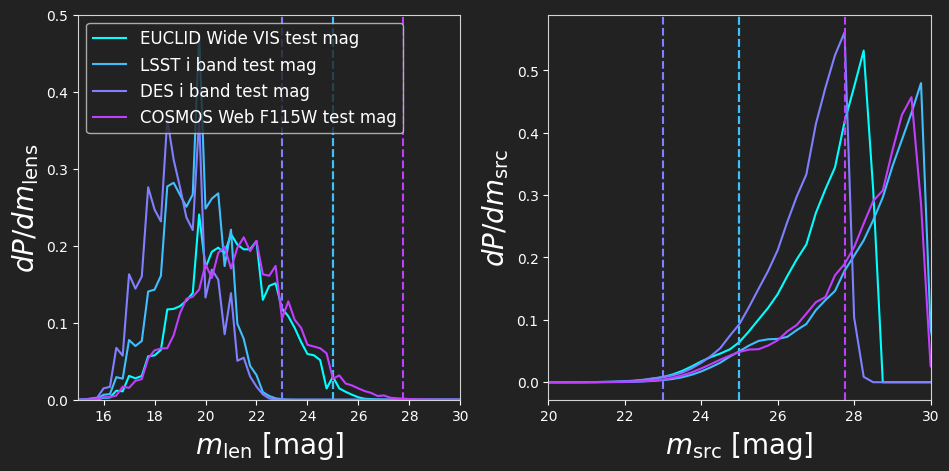

In [48]:
s  = ['EUCLID Wide VIS test mag', 'LSST i band test mag', 'DES i band test mag', 'COSMOS Web F115W test mag']

M_array = -1 * np.arange(15 , 23 , 0.25)
zl_array_test_mag = np.arange(0.0 , 2.1 , 0.1)
zs_array_test_mag = np.arange(0.0 , 5.6 , 0.2)
sg_array_test_mag = np.linspace(100 , 400 , 31)

min_SNR     = 20
arc_mu_thr  = 3

############################################################################################################################################
for title in s:
    survey_params = utils.read_survey_params(' '.join(title.split()[:-2]), VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']

    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_test_mag, zl_array_test_mag, zs_array_test_mag, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_test_mag, zl_array_test_mag, zs_array_test_mag, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
############################################################################################################################################

from scipy import integrate
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

def get_src_magnitude_distr(m_obs, m_cut, zs_array, prob, M_array_UV, obs_band = 'sdss_i0'):
    m_num = np.zeros(len(m_obs))
    M_array_UV   = M_array_UV[::-1] if (M_array_UV[0]>M_array_UV[-1]) else M_array_UV
    for izs, zs in enumerate(zs_array[zs_array>0]):
        obs_band_to_intr_UV_corr = 5 * np.log10(cosmo.luminosity_distance(zs).value * 1e5) + ls.K_correction_from_UV(zs, obs_band, M_array_UV)
        m_array_i = M_array_UV + obs_band_to_intr_UV_corr - 2.5 * np.log10(3)
        idcut = int(np.argmin(np.power(m_array_i-m_cut,2)))
        N_per_M = prob[izs][:][:][:]
        N_per_M[:][:][idcut-1:] = 0
        N_per_M = np.sum(N_per_M, axis=(0,1))
        if(0):
            print(f'z : {zs}')
            print(m_array_i[:6])
            print(N_per_M[:6])
            print(f'##########################################')
        for imu, mu in enumerate(m_array_i):
            m_idx = int(np.argmin(np.abs(m_obs - mu)))
            m_num[m_idx] = m_num[m_idx]+np.sum(N_per_M[imu])
    return m_num

color = iter(cm.cool(np.linspace(0, 1, len(s)+1)))
for iit, title in enumerate(s):
    ccc = next(color)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    survey_params = utils.read_survey_params(title, VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    photo_band   = survey_params['photo_band']
    print(title, limit, cut)
    m_obs = np.arange(15, 35, 0.5)
    mtest = ls.get_src_magnitude_distr(m_obs, cut, zs_array_test_mag, prob_noLL, M_array, obs_band = photo_band)
    mtes_ = ls.get_len_magnitude_distr(m_obs, zl_array_test_mag, sg_array_test_mag, matrix_noLL, obs_band = photo_band)

    print(int(np.sum(matrix_noLL)), int(np.sum(mtest)), int(np.sum(mtes_)))

lens_plot.plot_lens_src_magnitudes(s, zl_array_test_mag, zs_array_test_mag, sg_array_test_mag, M_array, AVG_MAGNIF_3 = 0, LENS_LIGHT = 0, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
#lens_plot.plot_lens_src_magnitudes(s, zl_array, zs_array, sigma_array, M_array, AVG_MAGNIF_3 = 0, LENS_LIGHT = 1, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|     EUCLID Wide VIS     |           0.170|     15000.000|         25.0|         26.2|          25|  3.7e+05 (  1.7e+05)|



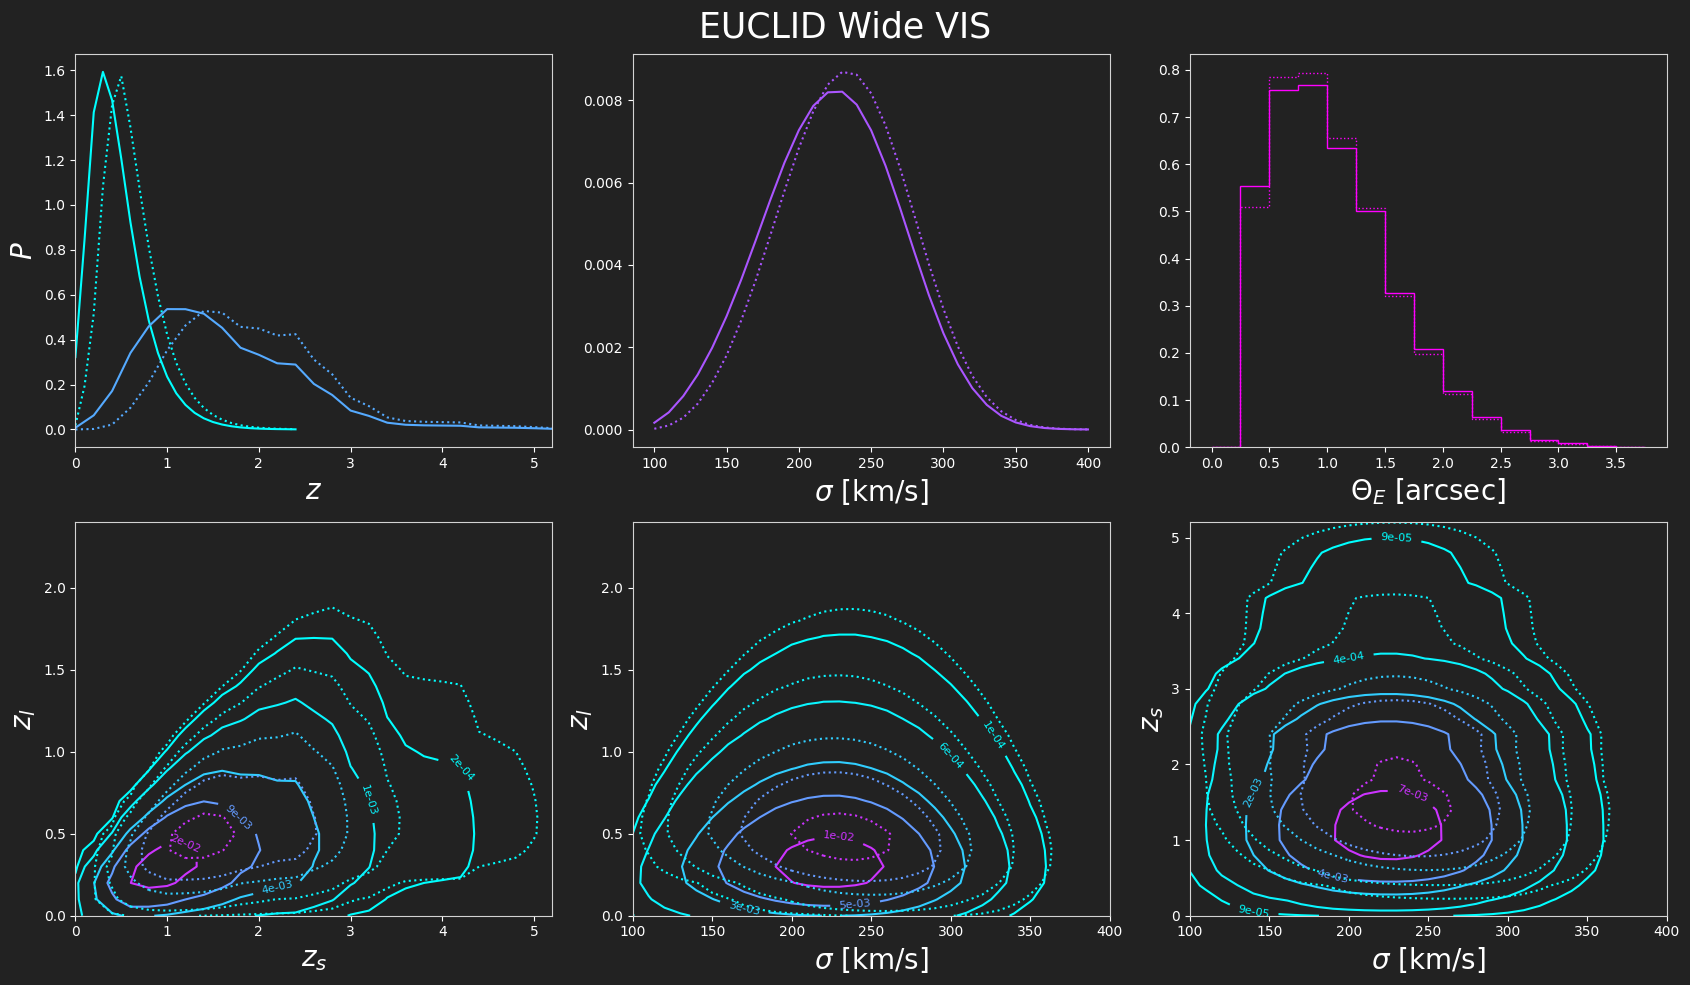

In [49]:
for title in ['EUCLID Wide VIS']: #'COSMOS Web F115W', 'LSST i band'
     survey_params = utils.read_survey_params(title, VERBOSE = 0)
     limit    = survey_params['limit']
     cut      = survey_params['cut']
     area     = survey_params['area']
     seeing   = survey_params['seeing']
     exp_time_sec = survey_params['exp_time_sec']
     zero_point_m = survey_params['zero_point_m']
     sky_bckgnd_m = survey_params['sky_bckgnd_m']
     photo_band   = survey_params['photo_band']

     try:
          # raise (ValueError)
          matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
     except ValueError:
          print('FILE do NOT exist - RUNNING MODEL')
          matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                      LENS_LIGHT_FLAG = False, SIE_FLAG = True)
          matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                      LENS_LIGHT_FLAG = True, SIE_FLAG = True)
          utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
     utils.print_summary_surveys([title])
     lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

     lens_plot.plot_ALL_distributions(title, zl_array, zs_array, sigma_array,
                                   Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
                                   PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 0)
     # fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
     # plt.subplots_adjust(wspace=.15, hspace=.2)
     # lens_plot.plot_z_sigma_distributions(fig, ax, title, zl_array, zs_array, sigma_array,
     #                               Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
     #                               PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
     #                               LOG = 0, SMOOTH = 1, SAVE = 1)
     # plt.show()

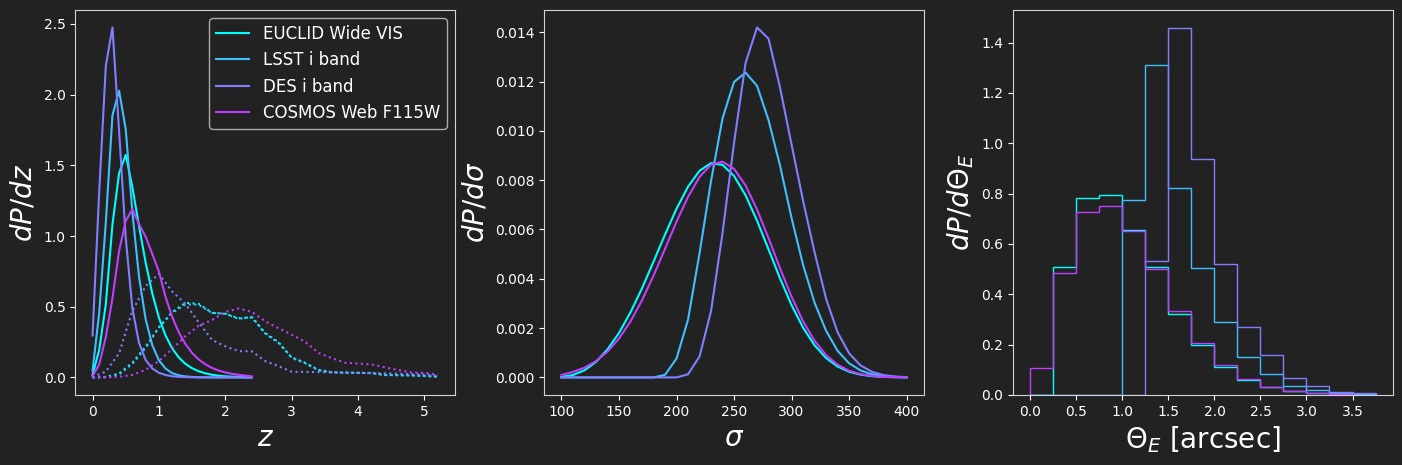

In [50]:
surveys_selection = ['EUCLID Wide VIS', 'LSST i band', 'DES i band', 'COSMOS Web F115W']
# surveys_selection = ['COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W']
# surveys_selection = surveys_titles
# lens_plot.compare_z_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
# lens_plot.compare_sigma_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
lens_plot.compare_ALL_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

COSMOS HST i band FAURE
Number of lenses 30 (14)
COSMOS HST i band FAURE Geng
Number of lenses 8 (4)
Area: 1.60 deg^2, Expected number of galaxies: 13 (9)
|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|    COSMOS HST i band    |           0.120|         1.600|         25.0|         26.5|          27|       43 (       23)|



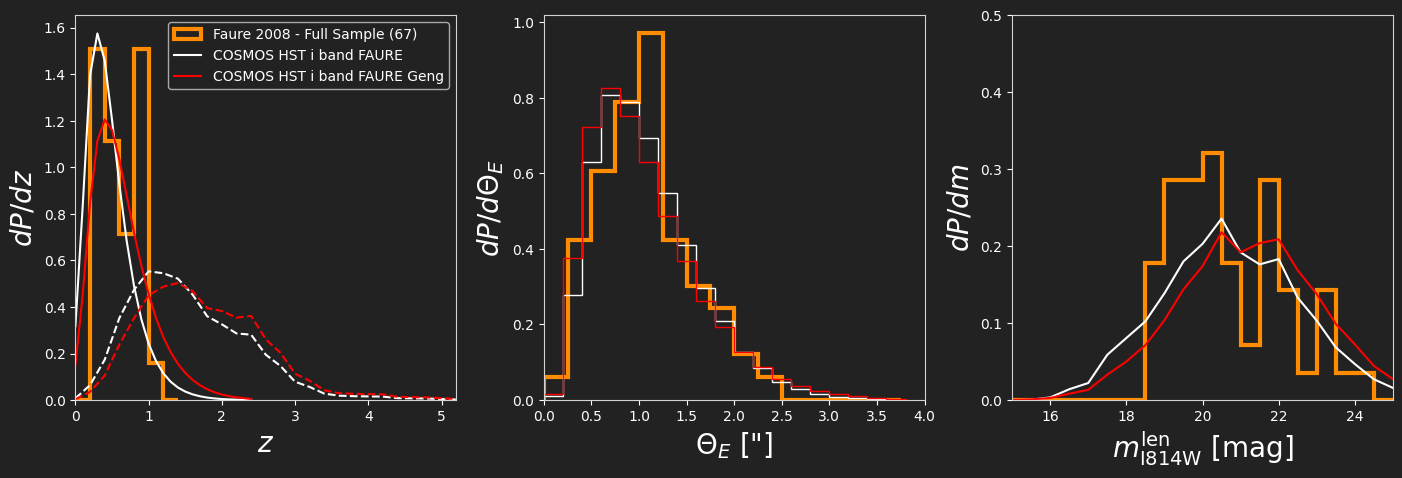

In [51]:
### COMPUTING FAURE COSMOS HST DISTRIBUTION ###
for title in ['COSMOS HST i band FAURE', 'COSMOS HST i band FAURE Geng']:
    survey_params = utils.read_survey_params('COSMOS HST i band', VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']

    sg_array_Faure = np.linspace(150 , 400 , 26) #sort of equiv to M_V<-20
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
        print(title)
        print(f'Number of lenses {int(np.sum(matrix_noLL[:][:][2:11]))} ({int(np.sum(matrix_LL[:][:][2:11]))})')
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_Faure, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Geng, LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_Faure, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Geng, LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

print(f'Area: {area:.2f} deg^2, Expected number of galaxies: {np.sum(matrix_noLL):.0f} ({np.sum(matrix_LL):.0f})')
utils.print_summary_surveys(['COSMOS HST i band'])
m_obs = np.linspace(15, 30, 31)
lens_plot.compare_COSMOS_HST_Faure(zl_array, zs_array, sg_array_Faure, M_array, cut, ONLY_FULL_SAMPLE = 1, LENS_LIGHT = 0, __MAG_OVER_ARCSEC_SQ__ = 0, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

CFHTLS i band
Number of lenses 621 (360)
CFHTLS i band Geng
Number of lenses 146 (109)


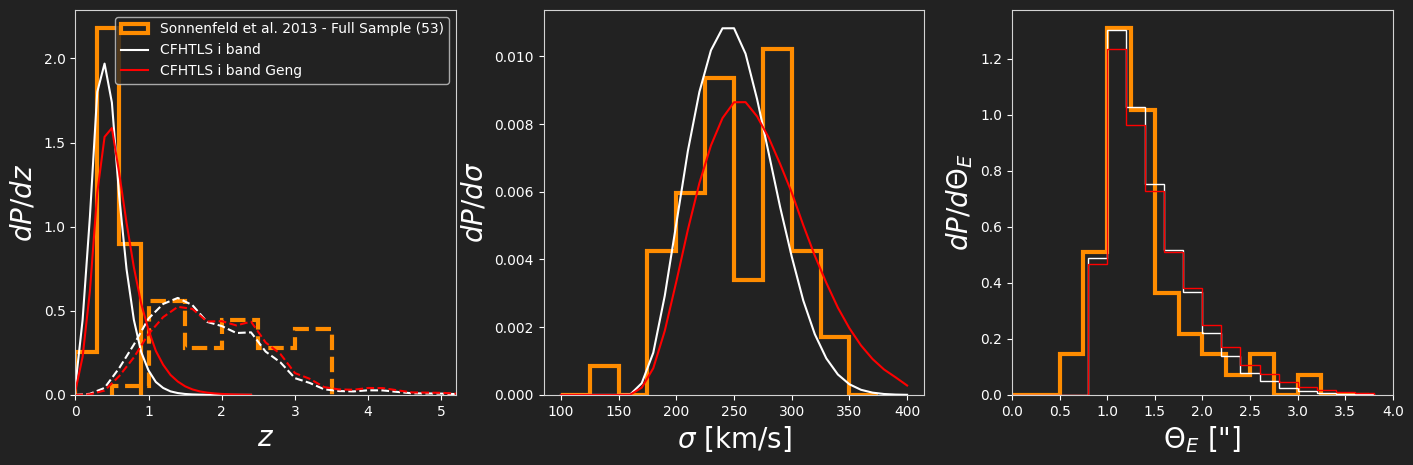

In [52]:
### COMPUTING Sonnenfeld SL2S DISTRIBUTION ###
for title in ['CFHTLS i band', 'CFHTLS i band Geng']:
    survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']

    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
        print(title)
        print(f'Number of lenses {int(np.sum(matrix_noLL[:][:][1:9]))} ({int(np.sum(matrix_LL[:][:][1:9]))})')
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Mason, LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Mason, LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
lens_plot.compare_SL2S(zl_array, zs_array, sigma_array, LENS_LIGHT = 1,  PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|       DES i band        |           0.960|      5000.000|         23.0|         24.7|           0|     1639 (      897)|

DES i band
Number of lenses 1638 (896)
DES i band Geng
Number of lenses 411 (297)


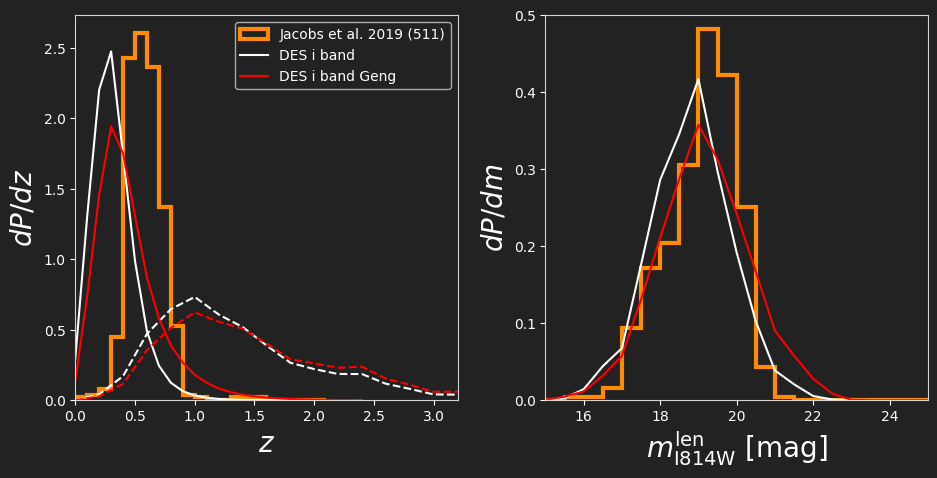

In [53]:
utils.print_summary_surveys(['DES i band'])
for title in ['DES i band', 'DES i band Geng']:
    print(title)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    print(f'Number of lenses {int(np.sum(matrix_noLL[:][:][:]))} ({int(np.sum(matrix_LL[:][:][:]))})')
lens_plot.compare_JACOBS_CNN_DES(zl_array, zs_array, sigma_array, LENS_LIGHT = 1,  PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|    COSMOS HST i band    |           0.120|         1.600|         25.0|         26.5|          27|       43 (       23)|



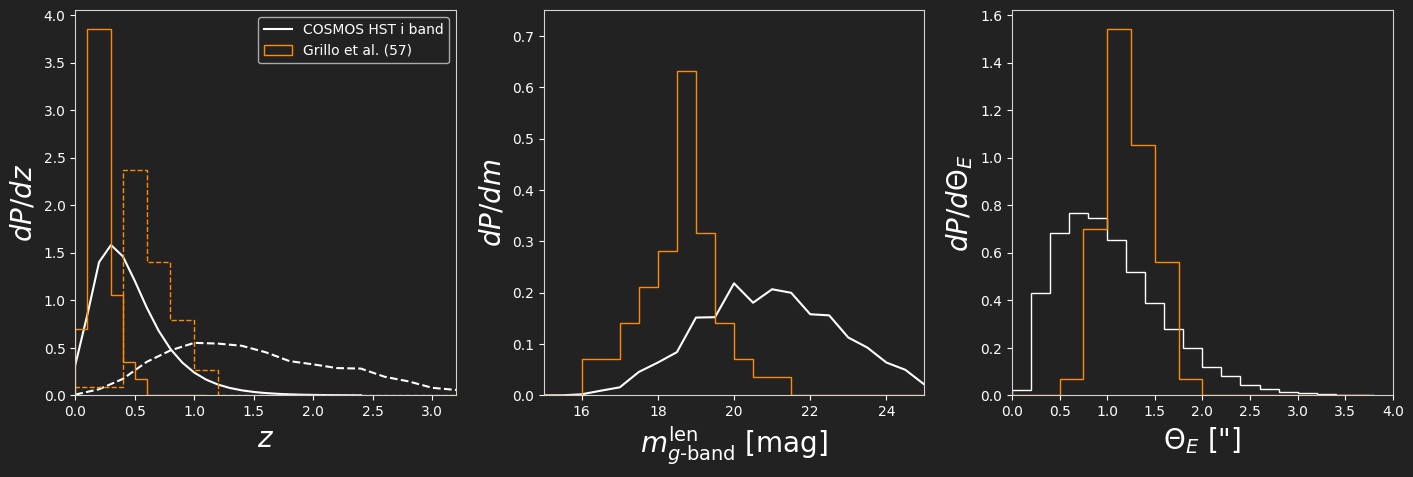

In [54]:
utils.print_summary_surveys(['COSMOS HST i band'])
lens_plot.compare_GRILLO_SLACS(zl_array, zs_array, sigma_array, LENS_LIGHT = 0,  PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)

In [5]:
M_array     = np.linspace(-13 , -25 , 25)
sigma_array = np.linspace(100 , 400 , 31)
zl_array    = np.arange(0.  , 2.5 , 0.1)
zs_array    = np.arange(0.  , 5.4 , 0.2)
min_SNR     = 20
arc_mu_thr  = 3
Phi_vel_dis = ls.Phi_vel_disp_Geng

title = 'SUBARU HSC SuGOHI i band'
survey_params = utils.read_survey_params(title, VERBOSE = 0)
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

try:
    raise(ValueError)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
except ValueError:
    print('FILE do NOT exist - RUNNING MODEL')
    matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                LENS_LIGHT_FLAG = False, SIE_FLAG = True)

    matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                LENS_LIGHT_FLAG = True, SIE_FLAG = False)

    utils.save_pickled_files(title + ' Geng',  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:34<00:00,  1.27s/it]


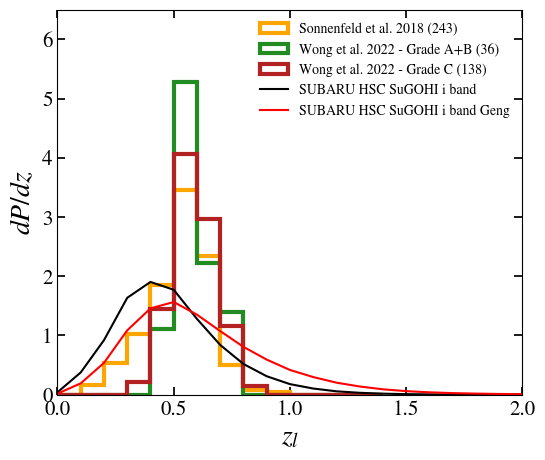

In [3]:
lens_plot.compare_SUGOHI(zl_array, zs_array, sigma_array, LENS_LIGHT = 1)

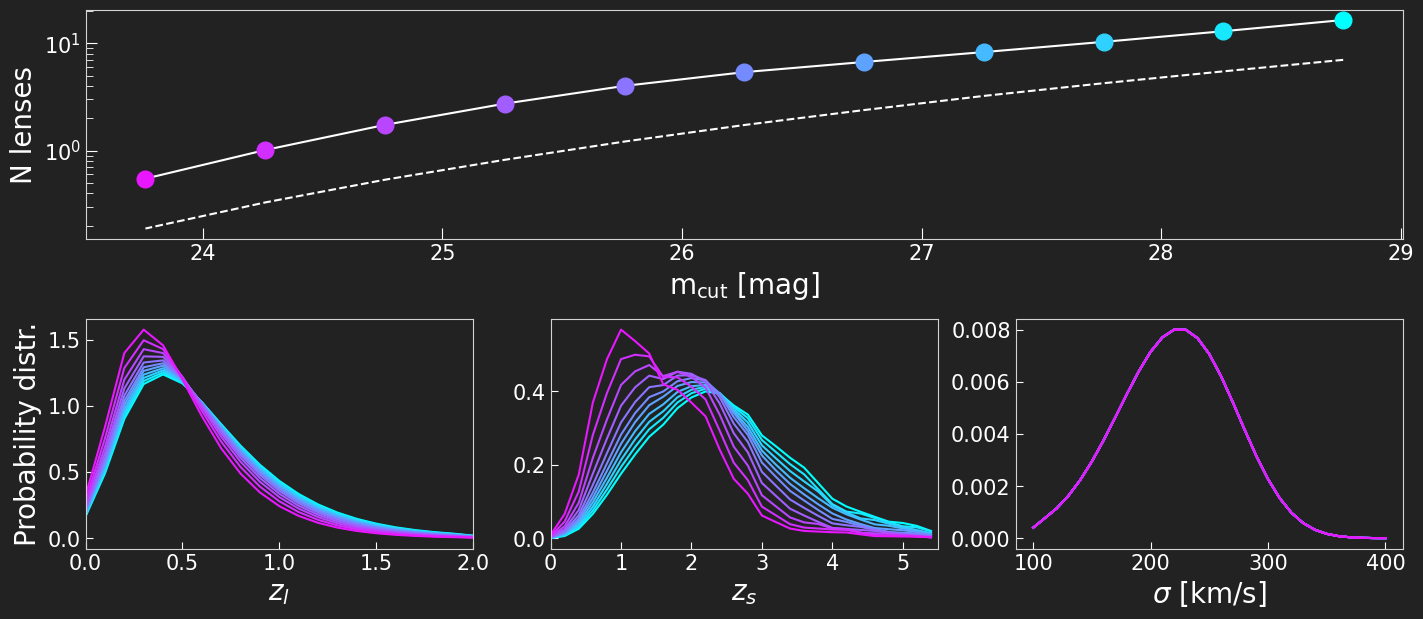

In [56]:
### COMPUTING effect of m_cut on the number of lenses and the parameters distributions ###
LENS_DENSITY  = 0
title = 'PEARLS NEP F115W'
survey_params = utils.read_survey_params(title, VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.arange(0.0 , 2.1 , 0.1)
zs_array_CFHTLS = np.arange(0.0 , 5.6 , 0.2)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)


_title_ = 'PEARLS NEP F115W band_mcut_'
delta_cut_limit = np.arange(0, 5.25, 0.5)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for iid, dlt in enumerate(delta_cut_limit):
    cut   = limit - dlt
    title = _title_ + str(iid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

if LENS_DENSITY:
    ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut/area, c = _c_)
    ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut_LL/area, c = _c_, ls='--')
else:
    ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut, c = _c_)
    ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(delta_cut_limit)+1)))
for iid, dlt in enumerate(delta_cut_limit):
    ccc = next(_col_)
    title = _title_ + str(iid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    if LENS_DENSITY:
        ax1.plot(limit - dlt, np.sum(matrix_noLL)/area, marker='o', c = ccc, ms = 12)
    else:
        ax1.plot(limit - dlt, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

ax1.set_yscale('log')
ax2.set_xlim((0, 2.0))
ax3.set_xlim((0, 5.5))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'm$_\text{cut}$ [mag]', fontsize=__size_labels__)
if LENS_DENSITY: ax1.set_ylabel(r'N lenses [deg$^{-2}$]' , fontsize=__size_labels__)
else: ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

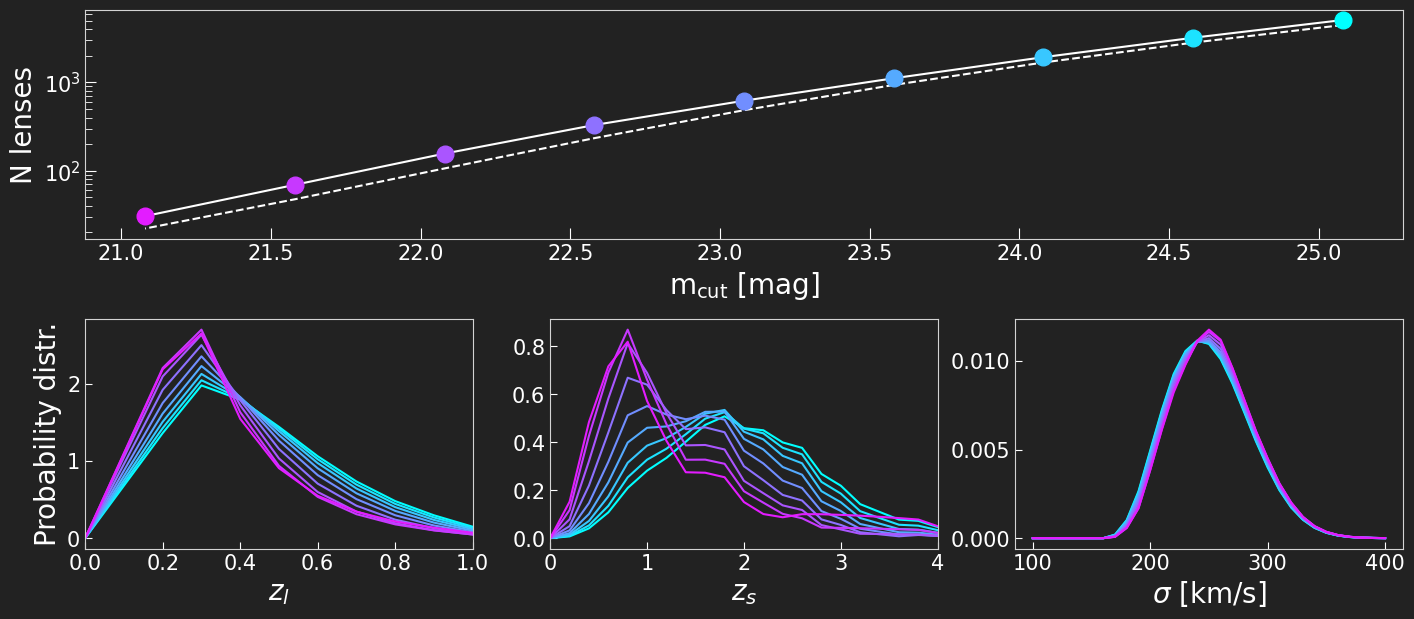

In [57]:
### COMPUTING effect of m_cut on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)


_title_ = 'CFHTLS i band_mcut_'
delta_cut_limit = np.arange(0, 4.25, 0.5)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for iid, dlt in enumerate(delta_cut_limit):
    cut   = limit - dlt
    title = _title_ + str(iid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut, c = _c_)
ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(delta_cut_limit)+1)))
for iid, dlt in enumerate(delta_cut_limit):
    ccc = next(_col_)
    title = _title_ + str(iid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    ax1.plot(limit - dlt, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

ax1.set_yscale('log')
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'm$_\text{cut}$ [mag]', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

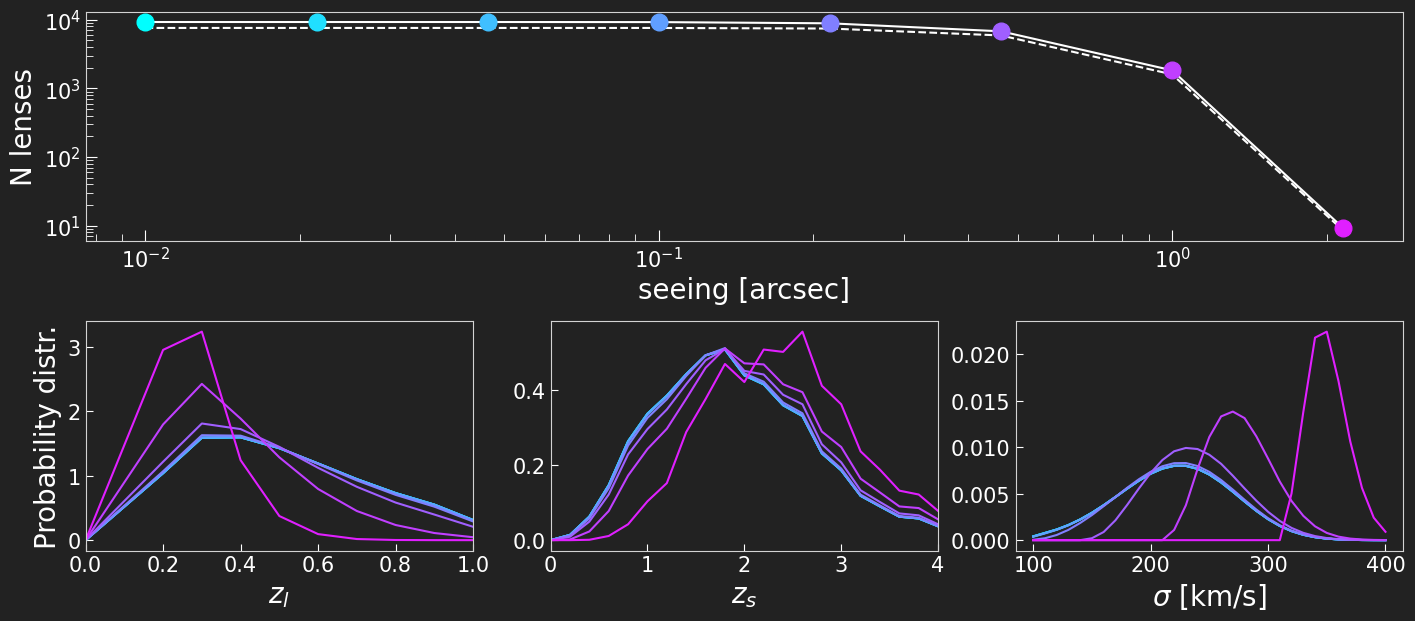

In [58]:
### COMPUTING effect of seeing on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
#seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)

_title_ = 'CFHTLS i band_seeing_'
cut   = limit
seeing_array = np.logspace(-2, 1, 10)[:8]
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for sid, seeing in enumerate(seeing_array):
    title = _title_ + str(sid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

ax1.plot(seeing_array, gal_num_vs_mcut, c = _c_)
ax1.plot(seeing_array, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(seeing_array)+1)))
for sid, seeing in enumerate(seeing_array):
    ccc = next(_col_)
    title = _title_ + str(sid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    ax1.plot(seeing, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'seeing [arcsec]', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

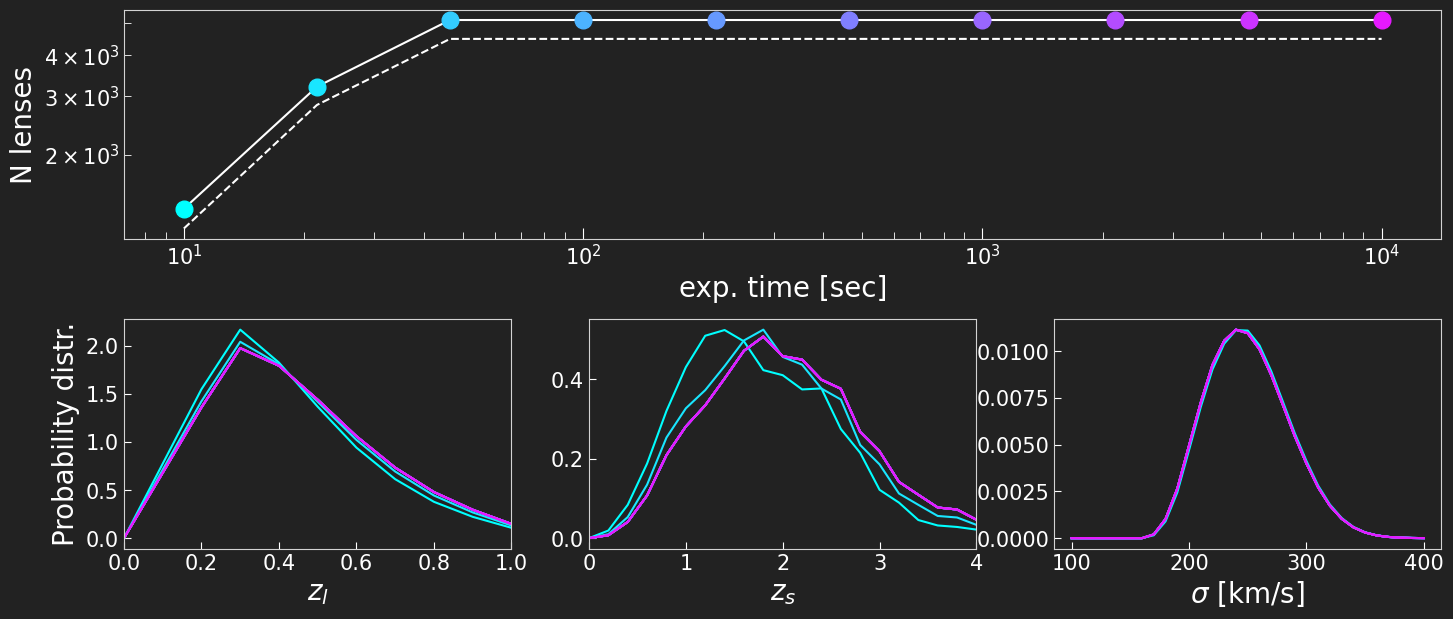

In [59]:
### COMPUTING effect of exp.time on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
#exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)

_title_ = 'CFHTLS i band_exposure_time_'
cut   = limit
exp_time_sec_array = np.logspace(1, 4, 10)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for tid, exp_time_sec in enumerate(exp_time_sec_array):
    title = _title_ + str(tid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

ax1.plot(exp_time_sec_array, gal_num_vs_mcut, c = _c_)
ax1.plot(exp_time_sec_array, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(exp_time_sec_array)+1)))
for eid, exp_time_sec in enumerate(exp_time_sec_array):
    ccc = next(_col_)
    title = _title_ + str(eid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    ax1.plot(exp_time_sec, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'exp. time [sec]', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

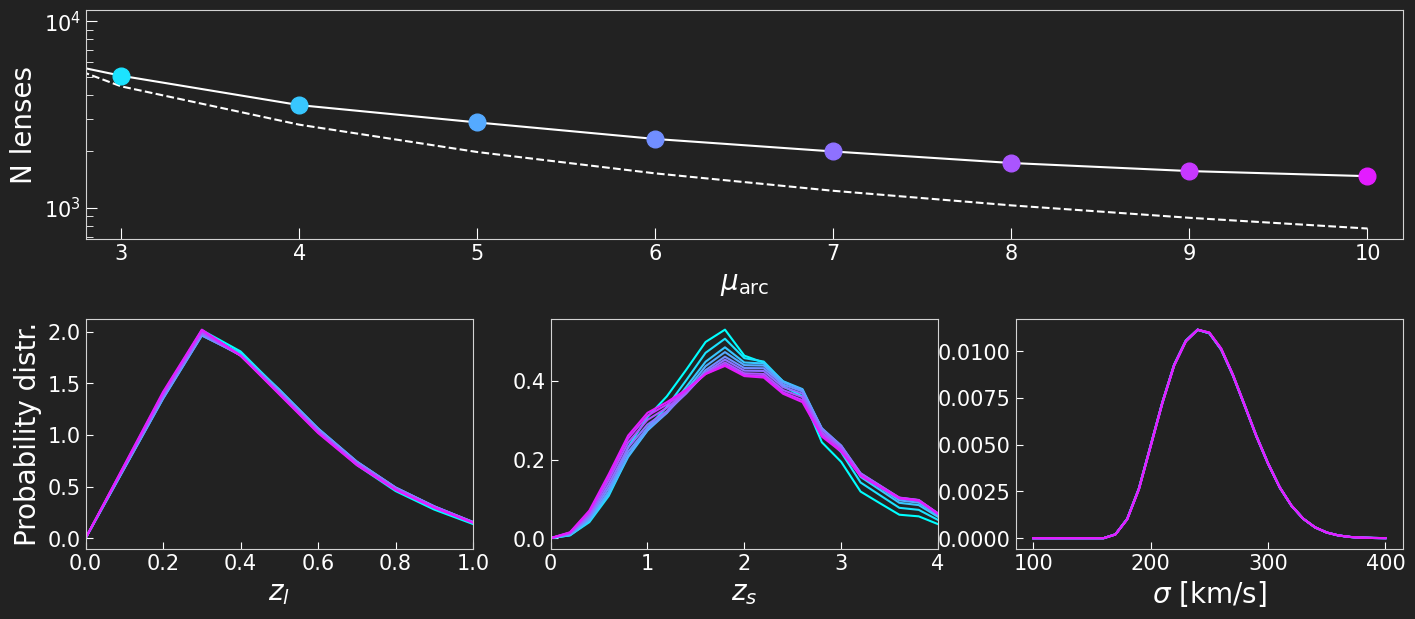

In [60]:
### COMPUTING effect of mu_arc on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
#arc_mu_thr = 3
min_SNR    = 20
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)

_title_ = 'CFHTLS i band_mu_arc_'
cut   = limit
arc_mu_thr_array = np.arange(2, 11, 1)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for aid, arc_mu_thr in enumerate(arc_mu_thr_array):
    title = _title_ + str(aid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

ax1.plot(arc_mu_thr_array, gal_num_vs_mcut, c = _c_)
ax1.plot(arc_mu_thr_array, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(arc_mu_thr_array)+1)))
for aid, arc_mu_thr in enumerate(arc_mu_thr_array):
    ccc = next(_col_)
    title = _title_ + str(aid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    ax1.plot(arc_mu_thr, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim((2.8,10.2))
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'$\mu_\text{arc}$', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

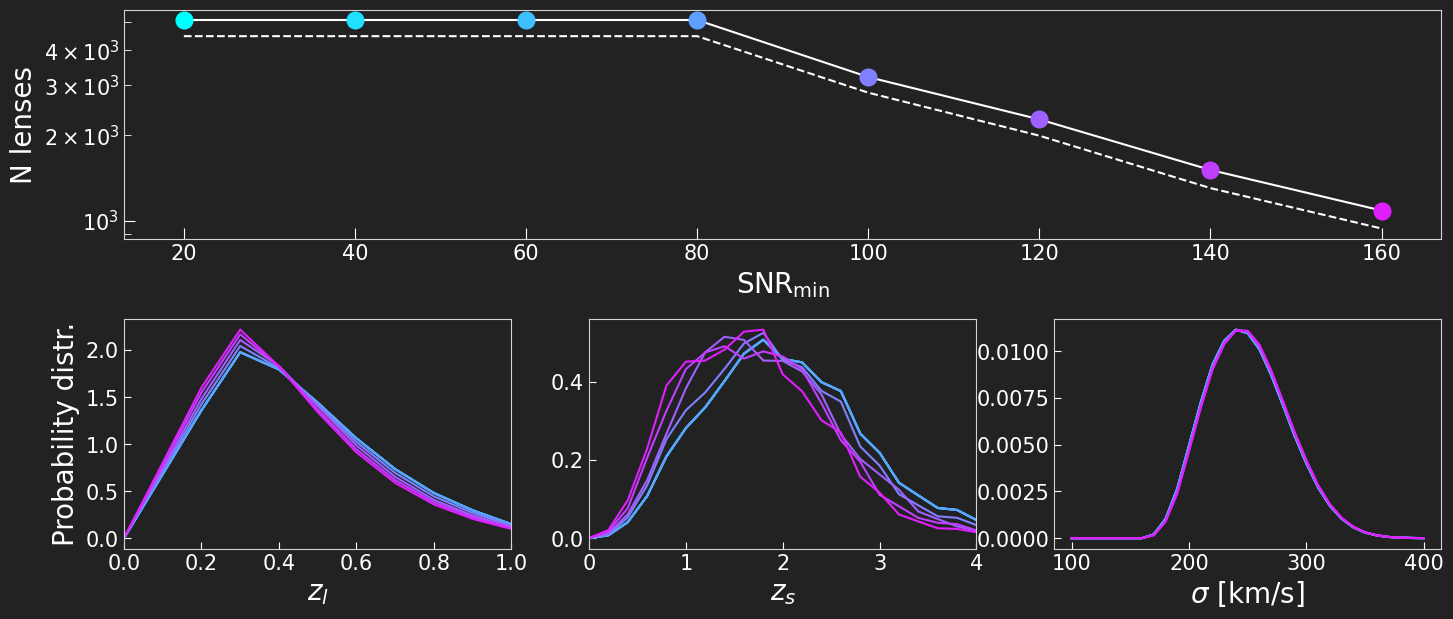

In [61]:
### COMPUTING effect of min_SNR on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
#min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)

_title_ = 'CFHTLS i band_SNR_'
cut   = limit
min_SNR_array = np.arange(20, 180, 20)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)

for SNRid, min_SNR in enumerate(min_SNR_array):
    title = _title_ + str(SNRid)
    try:
        #raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'

fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])

ax1.plot(min_SNR_array, gal_num_vs_mcut, c = _c_)
ax1.plot(min_SNR_array, gal_num_vs_mcut_LL, c = _c_, ls='--')

_col_  = iter(cmap_c(np.linspace(0, 1, len(min_SNR_array)+1)))
for SNRid, min_SNR in enumerate(min_SNR_array):
    ccc = next(_col_)
    title = _title_ + str(SNRid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH=1)

    ax1.plot(min_SNR, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)

    if(1):
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL), c=ccc, ls='-')
        ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
    else:
        ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_LL), c=ccc, ls='--')
        ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_LL), c=ccc, ls='--')
        ax4.plot(sg_array_CFHTLS, P_sg_LL, c=ccc, ls='--')

#ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim((2.8,10.2))
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))

__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'SNR$_\text{min}$', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
if(0):
    ax2.set_ylabel(r'$dP/dz_l$', fontsize=__size_labels__)
    ax3.set_ylabel(r'$dP/dz_s$', fontsize=__size_labels__)
    ax4.set_ylabel(r'$dP/d\sigma$'   , fontsize=__size_labels__)
else:
    ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)

ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)

ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)

plt.show()

FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:26<00:00,  1.00it/s]


FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:27<00:00,  1.00s/it]


FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:27<00:00,  1.01s/it]


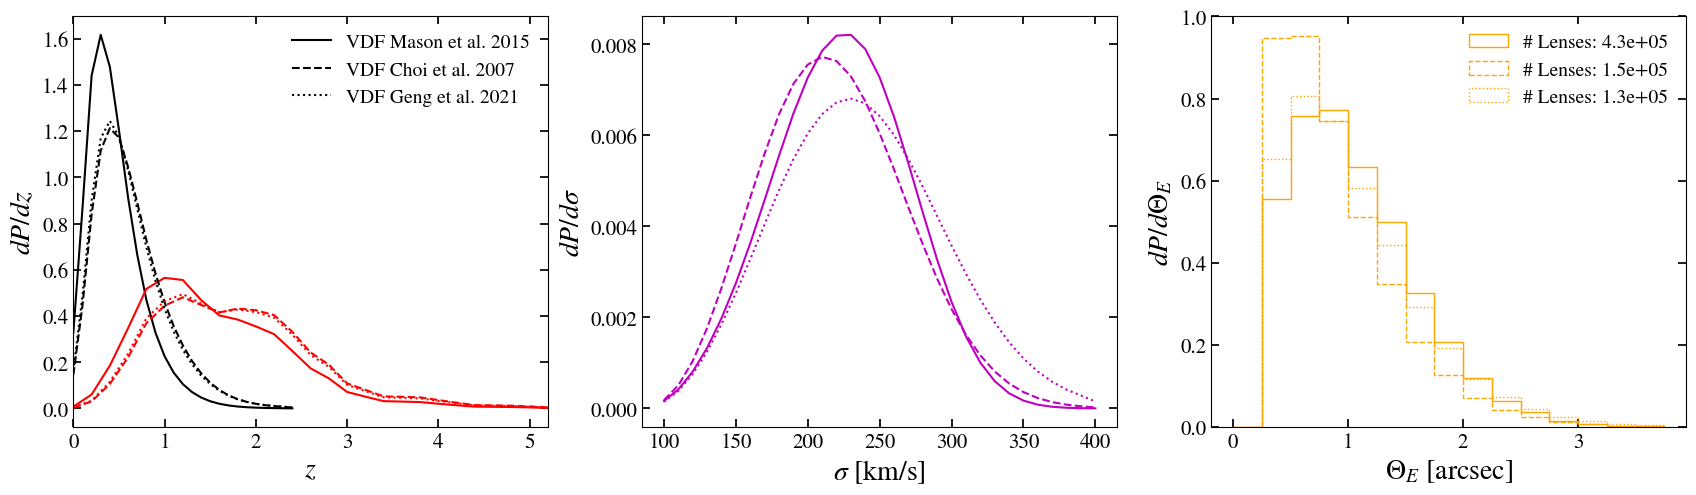

In [3]:
#Comparing the effect of vel disp functions
lens_plot.plot_effect_vel_disp_function(zl_array, zs_array, sigma_array, PLOT_FOR_KEYNOTE = 0, LENS_LIGHT = 0, SMOOTH = 1, READ_FILES = 0)
# lens_plot.plot_effect_vel_disp_function(zl_array, zs_array, sigma_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, LENS_LIGHT = 1, SMOOTH = 0, SAVE = 0)

Expecting 86 (88) lenses above z>0.5 in DES - noLL (LL)
|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|       DES i band        |           0.960|      5000.000|         23.0|         24.7|           0|     1639 (      897)|



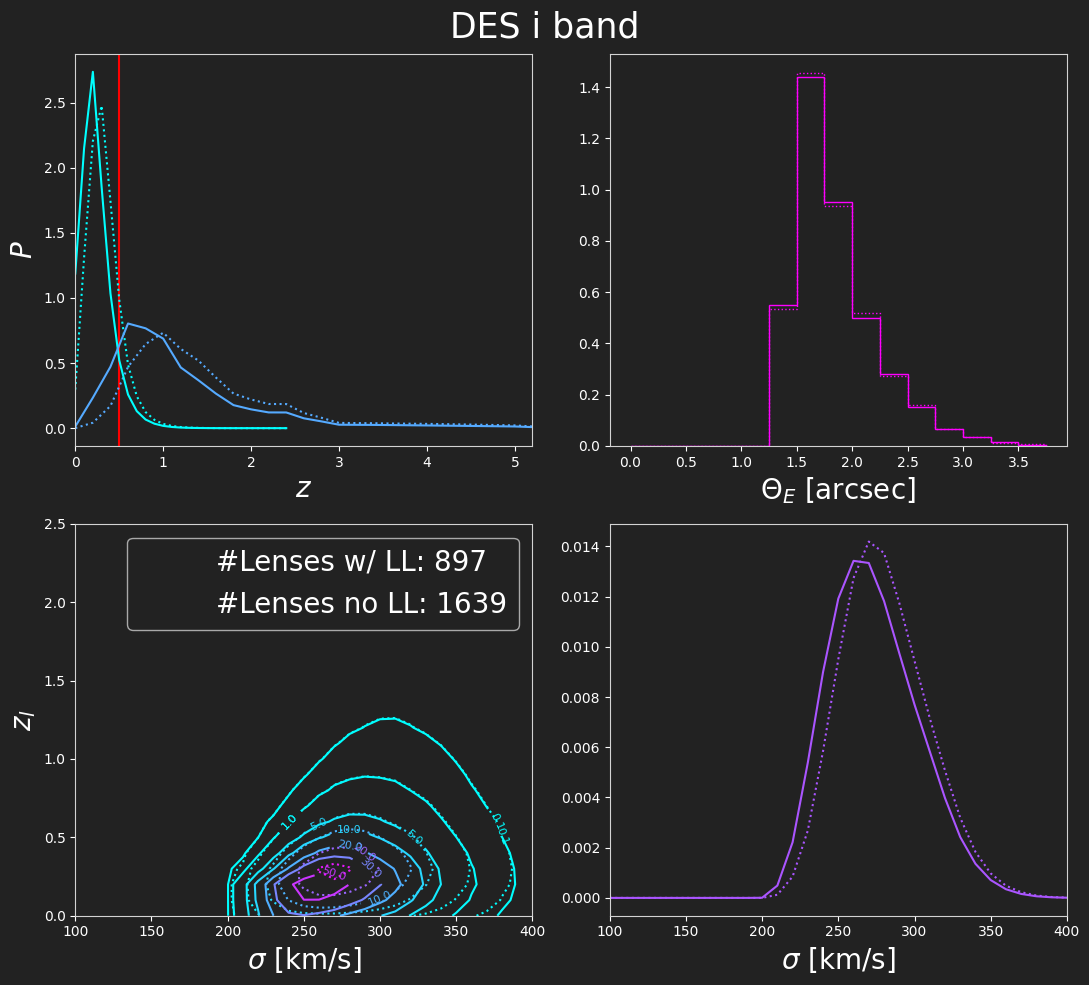

In [63]:
title = 'DES i band'
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)

_, __, ___, ____, P_zl_LL, _____ = ls.get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH = 1)
_, __, ___, ____, P_zl_noLL, _____ = ls.get_N_and_P_projections(matrix_noLL, sigma_array, zl_array, zs_array, SMOOTH = 1)

zl_tresh = 0.5
f_lens_LL, f_lens_noLL = np.sum(P_zl_LL[zl_array>zl_tresh]*np.diff(zl_array)[0]), np.sum(P_zl_noLL[zl_array>zl_tresh]*np.diff(zl_array)[0])
N_lens_LL, N_lens_noLL = np.sum(matrix_LL), np.sum(matrix_noLL)

print(f'Expecting {f_lens_noLL*N_lens_noLL:.0f} ({f_lens_LL*N_lens_LL:.0f}) lenses above z>{zl_tresh} in DES - noLL (LL)')

utils.print_summary_surveys([title])
lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
plt.subplots_adjust(wspace=.15, hspace=.2)
ax[0,0].axvline(0.5, c='r')
lens_plot.plot_z_sigma_distributions(fig, ax, title, zl_array, zs_array, sigma_array,
                            Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
                            PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
                            LOG = 0, SMOOTH = 1, SAVE = 1)
plt.show()

![Alt text](image.png)

In [64]:
def get_param_space_idx_from_obs_constraints(CW_ER_zl, CW_ER_zs, E_ring_rad, zs_array, zl_array, sigma_array):
    m_sg = np.zeros((len(zs_array), len(zl_array)))
    for izs, _zs in enumerate(zs_array):
        for izl, _zl in enumerate(zl_array):
            if((_zs>_zl) and (_zs>CW_ER_zs[0]-CW_ER_zs[2]) and (_zs<CW_ER_zs[0]+CW_ER_zs[1])):
                if((_zl>CW_ER_zl[0]-CW_ER_zl[2]) and (_zl<CW_ER_zl[0]+CW_ER_zl[1])):
                    m_sg[izs][izl] = sigma_from_R_Ein(_zs, _zl, E_ring_rad)
    sig_nozero_idx = np.zeros(0).astype(int)
    for sg_from_RE in m_sg[np.where(m_sg > 0)]:
            sig_nozero_idx = np.append(sig_nozero_idx, int(np.argmin(np.abs(sigma_array-sg_from_RE))))
    zs_nozero_idx, zl_nozero_idx = np.where(m_sg > 0)[0], np.where(m_sg > 0)[1]
    return zl_nozero_idx, zs_nozero_idx, sig_nozero_idx

def prob_for_obs_conf_in_param_space_per_sq_degree(survey_title,
                                                    CW_ER_zl, CW_ER_zs, E_ring_rad,
                                                    zs_array, zl_array, sigma_array, CHECK_LL = True):
    survey_params = utils.read_survey_params(survey_title, VERBOSE = 0)
    area     = survey_params['area']
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(survey_title)
    Ngal_zl_sigma_LL, Ngal_zs_sigma_LL, Ngal_zs_zl_LL, _ , __ , ___ = get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    mat = matrix_LL if CHECK_LL else matrix_noLL
    res = 0
    zl_nozero_idx, zs_nozero_idx, sig_nozero_idx = get_param_space_idx_from_obs_constraints(CW_ER_zl, CW_ER_zs, E_ring_rad, zs_array, zl_array, sigma_array)
    for src, sig, lns in zip(zs_nozero_idx, sig_nozero_idx, zl_nozero_idx):
        res = res + mat[src][sig][lns]
    return res/area

In [65]:
utils.print_summary_surveys(surveys_titles)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|    COSMOS Web F115W     |           0.040|         0.540|         26.8|         27.1|         146|       79 (       29)|

|    COSMOS Web F150W     |           0.050|         0.540|         26.4|         27.4|         140|       76 (       20)|

|    COSMOS Web F277W     |           0.092|         0.540|         27.0|         28.0|         276|      149 (       24)|

|    PEARLS NEP F115W     |           0.040|         0.015|         27.8|         28.8|         419|        6 (        2)|

|    PEARLS NEP F150W     |           0.050|         0.015|         27.9|         28.9|         524|        8 (        2)|

|    PEARLS NEP F277W     |           0.092|         0.015|         27.8|         28.8|         527|        8 (        1)|

|    JADES Deep F115W     |           0.040|         0.007|         28.8|         29.8|         918|        6 (        2)|

|    JAD

737.7249227454862 126.35336649478974


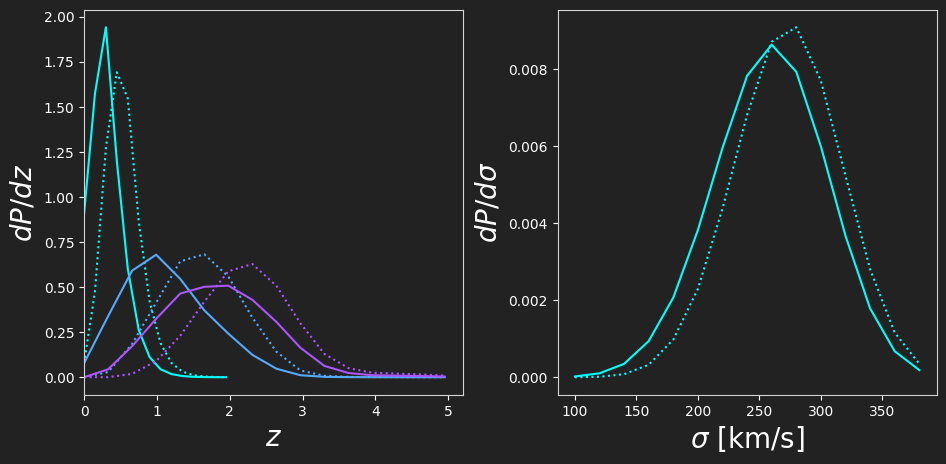

In [2]:
# Testing double lenses distributions

_test_dbl_sigma_array = np.arange(100 , 400 , 20  )
_test_dbl_zl_array    = np.arange(0.  , 2.0 , 0.15)
_test_dbl_zs_array    = np.arange(0.  , 5.0 , 0.33)

for title in ['EUCLID Wide VIS double lens']:
   survey_params = utils.read_survey_params(' '.join(title.split()[:-2]), VERBOSE = 0)
   limit    = survey_params['limit']
   cut      = survey_params['cut']
   area     = survey_params['area']
   seeing   = survey_params['seeing']
   exp_time_sec = survey_params['exp_time_sec']
   zero_point_m = survey_params['zero_point_m']
   sky_bckgnd_m = survey_params['sky_bckgnd_m']
   photo_band   = survey_params['photo_band']

   try:
      # raise (ValueError)
      matrix_LL, Theta_E_LL_z1, Theta_E_LL_z2, prob_LL, matrix_noLL, Theta_E_noLL_z1, Theta_E_noLL_z2, prob_noLL = utils.load_pickled_files(title, DOUBLE_LENS = 1)
   except ValueError:
      print('FILE do NOT exist - RUNNING MODEL')
      matrix_noLL, Theta_E_noLL_z1, Theta_E_noLL_z2, prob_noLL = ls.calculate_num_double_lenses_and_prob(
                                                                  _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, M_array, limit, area,
                                                                  seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                  photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                  LENS_LIGHT_FLAG = False, SIE_FLAG = True)
      print((np.sum(matrix_noLL)))
      matrix_LL, Theta_E_LL_z1, Theta_E_LL_z2, prob_LL = ls.calculate_num_double_lenses_and_prob(
                                                                  _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, M_array, limit, area,
                                                                  seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                  photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                  LENS_LIGHT_FLAG = True, SIE_FLAG = True)
      utils.save_pickled_files(title,  matrix_LL, (Theta_E_LL_z1, Theta_E_LL_z2), prob_LL, matrix_noLL, (Theta_E_noLL_z1, Theta_E_noLL_z2), prob_noLL, DOUBLE_LENS = 1)

   Ngal_zl_sigma, Ngal_zl_sigma, Ngal_zl_zs1, Ngal_zl_zs2, Ngal_sigma_zs1, Ngal_sigma_zs2, Ngal_zs1_zs2, P_zs1, P_zs2, P_zl, P_sg = ls.get_N_and_P_projections_double_lens(matrix_noLL, _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, SMOOTH=True)

   # utils.print_summary_surveys([' '.join(title.split()[:-2])])
   # lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
   # fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
   # plt.subplots_adjust(wspace=.15, hspace=.2)
   # lens_plot.plot_z_sigma_distributions(fig, ax, title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array,
   #                               (Theta_E_LL_z1, Theta_E_LL_z2), matrix_LL, (Theta_E_noLL_z1, Theta_E_noLL_z2), matrix_noLL,
   #                               PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
   #                               LOG = 0, SMOOTH = 1, SAVE = 1, DOUBLE_LENS = 1)
   # plt.show()
   print((np.sum(matrix_noLL)), (np.sum(matrix_LL)))
   lens_plot.plot_z_sigma_distributions_double_lenses(title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array, matrix_LL, matrix_noLL, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 0)

5388.687887623486 14688.940118632885


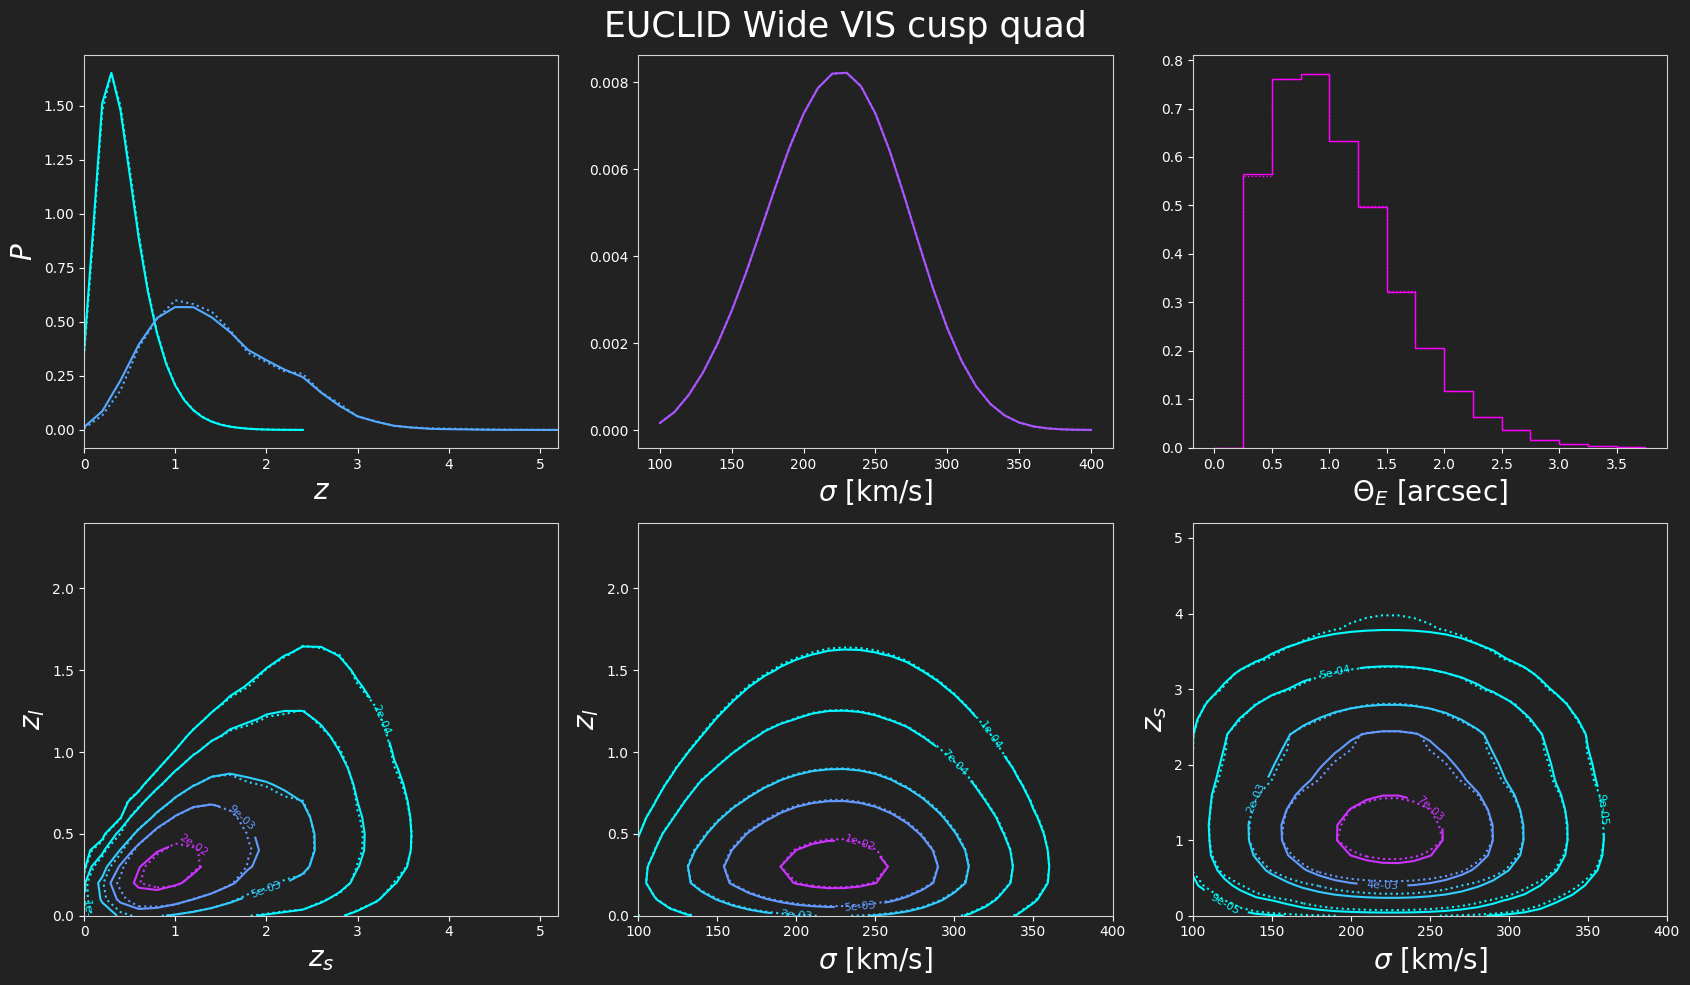

In [67]:
# Testing double lenses distributions

for title in ['EUCLID Wide VIS cusp quad']:
   survey_params = utils.read_survey_params(' '.join(title.split()[:-2]), VERBOSE = 0)
   limit    = survey_params['limit']
   cut      = survey_params['cut']
   area     = survey_params['area']
   seeing   = survey_params['seeing']
   exp_time_sec = survey_params['exp_time_sec']
   zero_point_m = survey_params['zero_point_m']
   sky_bckgnd_m = survey_params['sky_bckgnd_m']
   photo_band   = survey_params['photo_band']

   try:
      # raise (ValueError)
      matrix_cusp, Theta_E_cusp, _, matrix_quad, Theta_E_quad, __ = utils.load_pickled_files(title, DOUBLE_LENS = 0)
   except ValueError:
      print('FILE do NOT exist - RUNNING MODEL')
      matrix_cusp, matrix_quad, Theta_E  = ls.calculate_num_quad_cusps_lenses(
                                            sigma_array, zl_array, zs_array, M_array, limit, area,
                                            seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                            photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                            LENS_LIGHT_FLAG = False, SIE_FLAG = True)
      Theta_E_cusp, Theta_E_quad = Theta_E, Theta_E
      utils.save_pickled_files(title,  matrix_cusp, Theta_E, np.zeros(0), matrix_quad, Theta_E, np.zeros(0), DOUBLE_LENS = 0)

   Ngal_zl_sigma_cusp, Ngal_sigma_zs_cusp, Ngal_zl_zs_cusp, P_zs_cusp, P_zl_cusp, P_sg_cusp = ls.get_N_and_P_projections(matrix_cusp, sigma_array, zl_array, zs_array, SMOOTH=True)
   Ngal_zl_sigma_quad, Ngal_sigma_zs_quad, Ngal_zl_zs_quad, P_zs_quad, P_zl_quad, P_sg_quad = ls.get_N_and_P_projections(matrix_quad, sigma_array, zl_array, zs_array, SMOOTH=True)

   # utils.print_summary_surveys([' '.join(title.split()[:-2])])
   # lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
   # fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
   # plt.subplots_adjust(wspace=.15, hspace=.2)
   # lens_plot.plot_z_sigma_distributions(fig, ax, title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array,
   #                               (Theta_E_LL_z1, Theta_E_LL_z2), matrix_LL, (Theta_E_noLL_z1, Theta_E_noLL_z2), matrix_noLL,
   #                               PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
   #                               LOG = 0, SMOOTH = 1, SAVE = 1, DOUBLE_LENS = 1)
   # plt.show()
   print(np.sum(matrix_cusp), np.sum(matrix_quad))
   lens_plot.plot_ALL_distributions(title, zl_array, zs_array, sigma_array,
                                   Theta_E_cusp, matrix_cusp, Theta_E_quad, matrix_quad,
                                   PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 0)

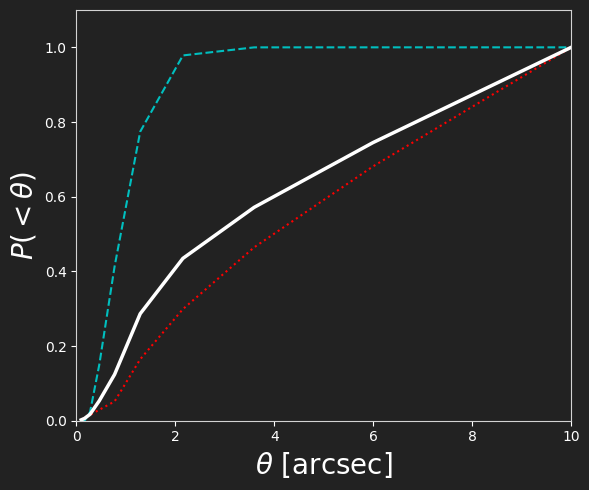

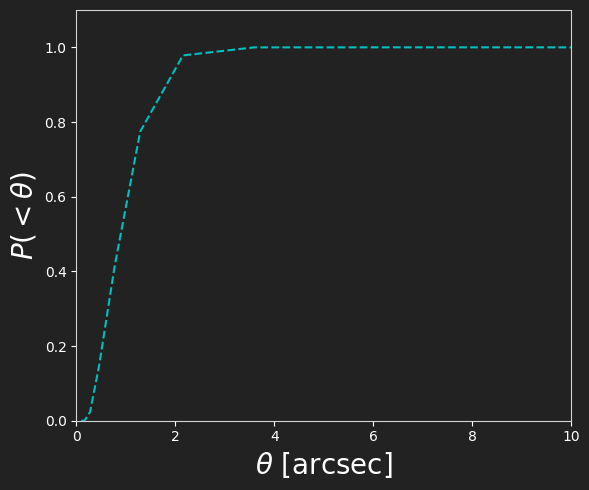

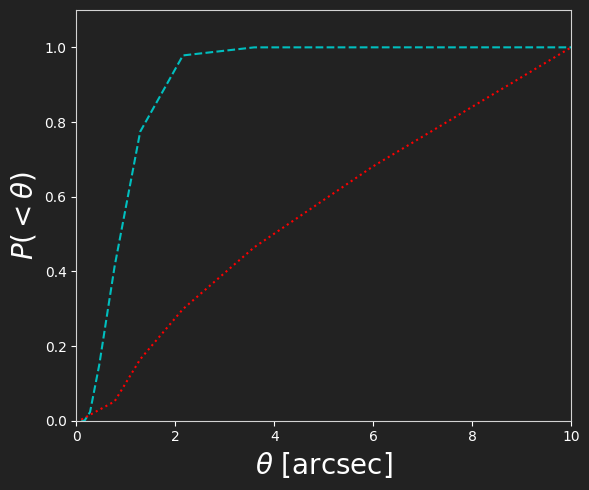

In [2]:
z = 1.7
M_sat, M_min, sigma_logM, alpha = 10**14.18, 10**12.46, 0.2, 1.0
z_array = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
N_z_nrm = np.array([0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0])


FOLDERPATH = os.path.split(os.path.dirname(os.path.abspath('')))[0]+'/GALESS/galess/data/omega/'
_theta_arcsec = np.logspace(-1,1,10)
if(0):
    M_h_array, HMF_array, nu_array, hmf_k, hmf_PS = HOD.init_lookup_table(z)
    NTOT = HOD.N_tot(M_h_array, M_sat, alpha, M_min, sigma_logM)
    N_g_AVG = HOD.get_AVG_N_tot(M_min, sigma_logM, M_sat, alpha, z)
    M_h_AVG = HOD.get_AVG_Host_Halo_Mass(M_min, sigma_logM, M_sat, alpha, z)
    b_eff = HOD.get_EFF_gal_bias(M_min, sigma_logM, M_sat, alpha, z, USE_MY_BIAS = 0)
    f_sat = HOD.get_AVG_f_sat(M_min, sigma_logM, M_sat, alpha, z)
    n_avg = HOD.get_N_dens_avg(z_array, M_min, sigma_logM, M_sat, alpha, z, N_z_nrm)
    print(f'redshift z   : {z:.2f}')
    print(f'n_avg        : {n_avg:.2e}')
    print(f'N_g_AVG      : {N_g_AVG:.2e}')
    print(f'log(M_h_AVG) : {np.log10(M_h_AVG):.2f}')
    print(f'b_eff        : {b_eff:.2f}')
    print(f'log(f_sat)   : {np.log10(f_sat):.2f}')
    theta = _theta_arcsec * 1/206265 # 1 arcsec in rad
    omega1h, omega2h = HOD.omega_array(theta, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, USE_MY_PS = True, REWRITE_TBLS = False)
    np.savetxt(FOLDERPATH + 'omega_1h_z'+str(int(z))+'_'+str(int(np.around(z%1, 2)*100))+'.txt', omega1h)
    np.savetxt(FOLDERPATH + 'omega_2h_z'+str(int(z))+'_'+str(int(np.around(z%1, 2)*100))+'.txt', omega2h)
omega1h = np.loadtxt(FOLDERPATH + 'omega_1h_z'+str(int(z))+'_'+str(int(np.around(z%1, 2)*100))+'.txt')
omega2h = np.loadtxt(FOLDERPATH + 'omega_2h_z'+str(int(z))+'_'+str(int(np.around(z%1, 2)*100))+'.txt')
if(0):
    COL = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
    line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
    ax.plot(_theta_arcsec, omega1h, c = COL,ls = '--', label=r'$\omega_{1h}$')
    ax.plot(_theta_arcsec, omega2h, c = COL,ls = '-.', label=r'$\omega_{2h}$')
    ax.plot(_theta_arcsec, omega1h+omega2h, c = COL,ls = '-')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((0.5,2e3))
    ax.set_ylim((1e-3,4e0)) if z < 3.7 else ax.set_ylim((1e-2,4e1))
    ax.set_xlabel(r'$\theta$ [arcsec]')
    ax.set_ylabel(r'$\omega$($\theta$)')
    plt.legend()
    plt.show()

lens_plot.plot_angular_separation('EUCLID Wide VIS', _theta_arcsec, (omega1h/2+omega2h),  frac_lens = 0.2, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___ )